<a href="https://colab.research.google.com/github/hema02004/Data-Mining/blob/main/exp10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of clusters: 3
Cluster labels: [ 0  0 -1  0 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  2 -1 -1  0  2  0  1  0  2
 -1  0 -1  1  0 -1  1  2  0  1 -1  0  1  1  0  1  2  2  1  1  1  2 -1  2
  0  2  1  0  1  0  1  0  1  0  2  1  0  2  2  0 -1  2  0 -1 -1  0 -1  1
  1  0  0  2  2 -1  2  0 -1  2  0  1  2 -1  0  0  1  1  2  0  0  1 -1  1
  2 -1  1  1  2 -1  1  1  1  2  2  2  1 -1  2  1  1 -1 -1  2 -1  2  1 -1
 -1  1  1  1 -1  1 -1 -1  2  2  1  1 -1  2  2  0  2  2 -1  2 -1  1 -1  1
  0  0 -1 -1 -1 -1  2  0  1  0  1  2  1  0 -1 -1  0  2  2  1  1  1 -1 -1
  1  2  0  2  0  2  1  0  2  0  1  2  0 -1 -1  1 -1 -1  1  1  0  1  2  2
 -1  1  2 -1  2  2  0 -1  2  2  2 -1 -1 -1 -1  0  2 -1  2  0  1 -1  1  0
  0  1  0  0  0 -1  0 -1  0  0 -1 -1  2  2  0 -1  1  2 -1 -1 -1  2  1  2
  2 -1  2  1  2  1 -1  1  2 -1  2 -1 -1 -1 -1  0  1  1  0  0 -1  2  1  2
 -1  1 -1 -1  0 -1 -1 -1  0  2 -1  1  0  1  1 -1 -1  0  1 -1  1 -1 -1  1
 -1 -1 -1  0  2  0  0  2  0  2 -1  1]
['r', 'b', 'g', 'y']


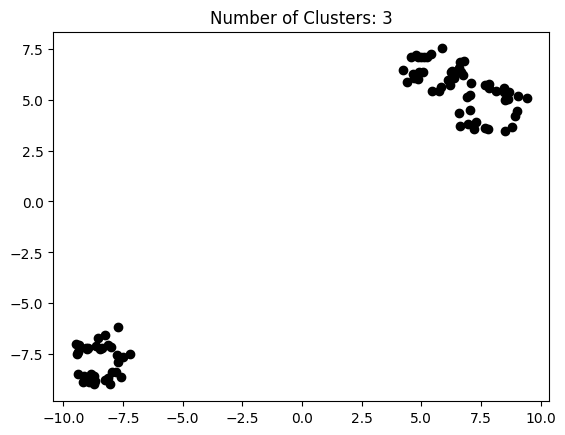

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
# Generate synthetic data using make_blobs
X, y_true = make_blobs(n_samples=300, cluster_std=0.50)
# Instantiate DBSCAN with epsilon=0.3 and min_samples=10
db = DBSCAN(eps=0.3, min_samples=10)
# Fit DBSCAN to the data
db = db.fit(X)
# Create a boolean mask to identify core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Retrieve the labels assigned to each data point
labels = db.labels_
# Count the number of clusters (excluding noise points)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Print the number of clusters and the cluster labels
print("Number of clusters:", n_clusters_)
print("Cluster labels:", labels)
# Set of unique labels assigned by DBSCAN
unique_labels = set(labels)
# Define colors for each cluster
colors = ['r', 'b', 'g', 'y']
# Print the list of colors
print(colors)
# Iterate over each unique label and corresponding color
for k, col in zip(unique_labels, colors):
 if k == -1:
  col = 'k'

 # Create a boolean mask to identify points belonging to the current cluster
  class_member_mask = (labels == k)

 # Plot core points of the current cluster
  xy = X[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

 # Plot non-core points of the current cluster
  xy = X[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)
# Set the title of the plot to display the number of clusters
plt.title('Number of Clusters: %d' % n_clusters_)
# Display the plot
plt.show()